<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-loading-data" data-toc-modified-id="1.-loading-data-1">1. loading data</a></span></li><li><span><a href="#2.-creating-graph-and-training" data-toc-modified-id="2.-creating-graph-and-training-2">2. creating graph and training</a></span></li><li><span><a href="#3.-visualization" data-toc-modified-id="3.-visualization-3">3. visualization</a></span></li></ul></div>

In [1]:
import pandas as pd
from node2vec import Node2Vec
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

## 1. loading data

In [2]:
data = pd.read_csv('./seealsology-data.tsv', sep='\t')
data.head(5)

,source,target,depth
0,life insurance,corporate-owned life insurance,1
1,life insurance,critical illness insurance,1
2,life insurance,economic capital,1
3,life insurance,estate planning,1
4,life insurance,false insurance claims,1


In [3]:
data.tail(5)

,source,target,depth
3739,health system,two-tier health care,4
3740,health system,universal health care,4
3741,health administration,master of health administration,4
3742,health administration,nosokinetics,4
3743,ansi 834 enrollment implementation format,x12 document list,4


## 2. creating graph and training

In [4]:
# set weight
data['weight'] = data['depth'].map({1: 1, 2: 0.75, 3: 0.5, 4: 0.25})

# create graph
Graph = nx.DiGraph()
Graph.add_weighted_edges_from([(i,j,k) for i, j, k in zip(data['source'], data['target'], data['weight'])])

dim = 128

# random walk
model_random = Node2Vec(Graph, dimensions=dim, walk_length=5, num_walks=15, p=1, q=1, quiet=True)
result_random = model_random.fit(window=3, iter=20)

# BFS
model_BFS = Node2Vec(Graph, dimensions=dim, walk_length=5, num_walks=15, p=0.5, q=3, quiet=True)
result_BFS = model_BFS.fit(window=3, iter=20)

# DFS
model_DFS = Node2Vec(Graph, dimensions=dim, walk_length=5, num_walks=15, p=3, q=0.5, quiet=True)
result_DFS = model_DFS.fit(window=3, iter=20)

In [5]:
# similar to critical illness insurance
print('RAN', result_random.wv.most_similar('critical illness insurance')[0])
print('BFS', result_BFS.wv.most_similar('critical illness insurance')[0])
print('DFS', result_DFS.wv.most_similar('critical illness insurance')[0])

RAN ('whole life insurance', 0.9986088275909424)
BFS ('internal revenue code section 79', 0.9984707832336426)
DFS ('health insurance', 0.9988100528717041)


## 3. visualization

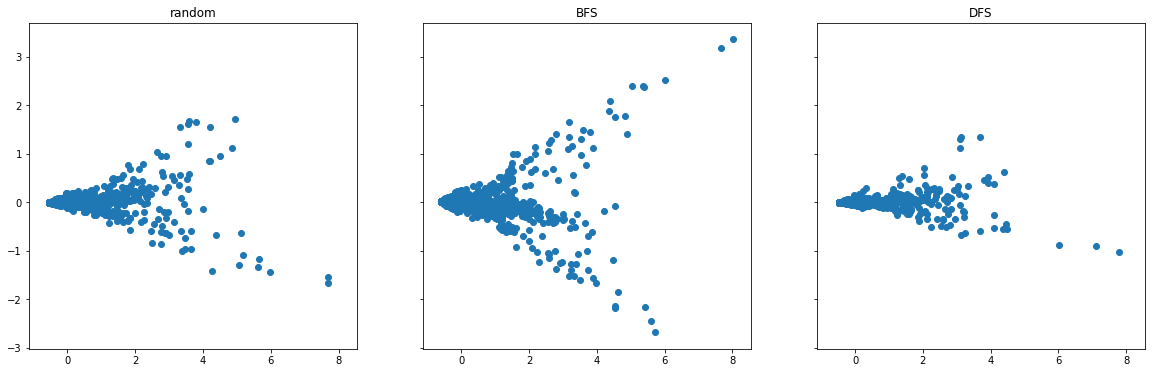

In [6]:
def scatter(result_model):
    # embedding matrix
    embeddings = result_model.wv
    word_list = list(result_model.wv.vocab.keys())
    matrix = np.array([embeddings[x] for x in word_list])

    # decomposition
    pca = PCA(n_components=2)
    result = pca.fit_transform(matrix)
    return result

s_random = scatter(result_random)
s_BFS = scatter(result_BFS)
s_DFS = scatter(result_DFS)


# visualization
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True, sharex=True)
ax[0].scatter(s_random[:,0], s_random[:,1])
ax[0].set_title('random')
ax[1].scatter(s_BFS[:,0], s_BFS[:,1])
ax[1].set_title('BFS')
ax[2].scatter(s_DFS[:,0], s_DFS[:,1])
ax[2].set_title('DFS')
plt.show()